In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading
## Barley Data set!

In [2]:
df = pd.read_csv('/content/drive/MyDrive/crops_dataset/updated_crop_prices/new_barley.csv')

In [3]:
df

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1100.0,1150.0,1125.0,06-08-2008
1,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1160.0,1155.0,05-08-2008
2,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1050.0,1090.0,1075.0,04-08-2008
3,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1175.0,1165.0,02-08-2008
4,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1175.0,1165.0,01-08-2008
...,...,...,...,...,...,...,...,...,...
239294,Kanpur,Varipaal,Barley (Jau),Dara,FAQ,1600.0,1620.0,1610.0,19-12-2020
239295,Kanpur,Varipaal,Barley (Jau),Dara,FAQ,1600.0,1620.0,1610.0,14-12-2020
239296,Kanpur,Varipaal,Barley (Jau),Dara,FAQ,1600.0,1620.0,1610.0,12-12-2020
239297,Kanpur,Varipaal,Barley (Jau),Dara,FAQ,1400.0,1600.0,1500.0,27-10-2020


# Pre-processing

In [4]:
df.shape

(239299, 9)

In [5]:
rows = df.shape[0]
rows

239299

In [6]:
cols = df.shape[1]
cols

9

In [7]:
df.isna().any()

District Name                False
Market Name                  False
Commodity                    False
Variety                      False
Grade                        False
Min Price (Rs./Quintal)      False
Max Price (Rs./Quintal)      False
Modal Price (Rs./Quintal)    False
Price Date                   False
dtype: bool

## Dealing with Null Values!

In [8]:
# Number of Null values in the entire dataframe
df.isna().sum().sum()

0

In [9]:
## Checking number of null values in all the columns!

column_names = list(df.columns)
for i in range(0, len(column_names)):
  print(f"Column No: {i+1} = {column_names[i]} has {df[column_names[i]].isna().sum()} Null values!")

Column No: 1 = District Name has 0 Null values!
Column No: 2 = Market Name has 0 Null values!
Column No: 3 = Commodity has 0 Null values!
Column No: 4 = Variety has 0 Null values!
Column No: 5 = Grade has 0 Null values!
Column No: 6 = Min Price (Rs./Quintal) has 0 Null values!
Column No: 7 = Max Price (Rs./Quintal) has 0 Null values!
Column No: 8 = Modal Price (Rs./Quintal) has 0 Null values!
Column No: 9 = Price Date has 0 Null values!


In [10]:
# No of unique values in all the columns

for i in range(0, len(column_names)):
  print(f'The column {column_names[i]} has {df[column_names[i]].nunique()} unique values!')

The column District Name has 202 unique values!
The column Market Name has 593 unique values!
The column Commodity has 1 unique values!
The column Variety has 5 unique values!
The column Grade has 2 unique values!
The column Min Price (Rs./Quintal) has 2524 unique values!
The column Max Price (Rs./Quintal) has 2738 unique values!
The column Modal Price (Rs./Quintal) has 2850 unique values!
The column Price Date has 5792 unique values!


In [11]:
df.columns

Index(['District Name', 'Market Name', 'Commodity', 'Variety', 'Grade',
       'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal Price (Rs./Quintal)', 'Price Date'],
      dtype='object')

In [12]:
import pandas as pd

# Assuming df is your DataFrame
df.columns = df.columns.str.replace(' ', '_').str.lower()

# Alternatively, you can use the following code to replace spaces with underscores and convert to lowercase
# df.columns = [col.lower().replace(' ', '_') for col in df.columns]

# Now, the column names will be in lowercase and with underscores instead of spaces
print(df.columns)


Index(['district_name', 'market_name', 'commodity', 'variety', 'grade',
       'min_price_(rs./quintal)', 'max_price_(rs./quintal)',
       'modal_price_(rs./quintal)', 'price_date'],
      dtype='object')


In [13]:
df.head(5)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date
0,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1100.0,1150.0,1125.0,06-08-2008
1,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1160.0,1155.0,05-08-2008
2,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1050.0,1090.0,1075.0,04-08-2008
3,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1175.0,1165.0,02-08-2008
4,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1175.0,1165.0,01-08-2008


### dealing with modal_price if its having value as 0

In [14]:
df['modal_price_(rs./quintal)'].dtype

dtype('float64')

In [15]:


zero_count = df['modal_price_(rs./quintal)'].value_counts().get(0, 0)
print(f"Number of rows with modal_price_(rs./quintal) as 0: {zero_count}")


Number of rows with modal_price_(rs./quintal) as 0: 2365


In [16]:
import numpy as np

# Define a function to calculate the average price for each row
def calculate_average(row):
    if row['modal_price_(rs./quintal)'] == 0:
        return (row['min_price_(rs./quintal)'] + row['max_price_(rs./quintal)']) / 2
    else:
        return row['modal_price_(rs./quintal)']

# Apply the function to calculate the average price for each row
df['modal_price_(rs./quintal)'] = df.apply(calculate_average, axis=1)


In [17]:
zero_count = df['modal_price_(rs./quintal)'].value_counts().get(0, 0)
print(f"Number of rows with modal_price_(rs./quintal) as 0: {zero_count}")

Number of rows with modal_price_(rs./quintal) as 0: 0


In [18]:
df['month'] = df['price_date'].str[3:5].astype(int)
df['year'] = df['price_date'].str[6:].astype(int)


In [19]:
df.head(3)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,month,year
0,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1100.0,1150.0,1125.0,06-08-2008,8,2008
1,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1160.0,1155.0,05-08-2008,8,2008
2,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1050.0,1090.0,1075.0,04-08-2008,8,2008


In [20]:
df['price_date'].dtype


dtype('O')

In [21]:
# Convert 'price_date' to timestamp
df['price_date'] = pd.to_datetime(df['price_date'], format='%d-%m-%Y')

# Convert 'month' and 'year' to int
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)

# Display the updated DataFrame
print(df.dtypes)

district_name                        object
market_name                          object
commodity                            object
variety                              object
grade                                object
min_price_(rs./quintal)             float64
max_price_(rs./quintal)             float64
modal_price_(rs./quintal)           float64
price_date                   datetime64[ns]
month                                 int64
year                                  int64
dtype: object


In [22]:
df_copy = df

# Encoding Columns

## district Name

In [23]:
df['district_name'].nunique()

202

In [24]:
value_counts = df['district_name'].value_counts()

In [25]:
value_counts

Ganganagar                   20498
Jaipur                       16900
Hanumangarh                  10748
Ajmer                        10411
Tonk                         10291
                             ...  
Bhadohi(Sant Ravi Nagar)         1
Bargarh                          1
Bharuch                          1
Sonipat                          1
Malda                            1
Name: district_name, Length: 202, dtype: int64

In [26]:
district_name_frequency = df['district_name'].value_counts(normalize=False)

# Create a new column with encoded values
df['district_name_encoded'] = df['district_name'].map(district_name_frequency)

In [27]:
df.head(5)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,month,year,district_name_encoded
0,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1100.0,1150.0,1125.0,2008-08-06,8,2008,30
1,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1160.0,1155.0,2008-08-05,8,2008,30
2,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1050.0,1090.0,1075.0,2008-08-04,8,2008,30
3,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1175.0,1165.0,2008-08-02,8,2008,30
4,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1175.0,1165.0,2008-08-01,8,2008,30


## market name

In [28]:
df['market_name'].nunique()

593

In [29]:
value_counts = df['market_name'].value_counts()

In [30]:
value_counts

Neemuch                        3446
Alwar                          3242
Chomu                          3239
Chaksu                         3225
Dahod                          3224
                               ... 
Nilokheri                         1
New Grain Market , Sonipat        1
Chomu(F&V)                        1
Gopiganj                          1
Balotra                           1
Name: market_name, Length: 593, dtype: int64

In [31]:
market_name_frequency = df['market_name'].value_counts(normalize=False)

# Create a new column with encoded values
df['market_name_encoded'] = df['market_name'].map(market_name_frequency)

In [32]:
df.head(5)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,month,year,district_name_encoded,market_name_encoded
0,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1100.0,1150.0,1125.0,2008-08-06,8,2008,30,30
1,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1160.0,1155.0,2008-08-05,8,2008,30,30
2,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1050.0,1090.0,1075.0,2008-08-04,8,2008,30,30
3,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1175.0,1165.0,2008-08-02,8,2008,30,30
4,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1175.0,1165.0,2008-08-01,8,2008,30,30


In [33]:
df = df.drop('commodity',axis=1)

## variety

In [34]:
df['variety'].nunique()

5

In [35]:
value_counts = df['variety'].value_counts()

In [36]:
variety_frequency = df['variety'].value_counts(normalize=False)

# Create a new column with encoded values
df['variety_encoded'] = df['variety'].map(variety_frequency)

In [37]:
df.head(5)

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,month,year,district_name_encoded,market_name_encoded,variety_encoded
0,Cuddapah,Cuddapah,Deshi,FAQ,1100.0,1150.0,1125.0,2008-08-06,8,2008,30,30,34911
1,Cuddapah,Cuddapah,Deshi,FAQ,1150.0,1160.0,1155.0,2008-08-05,8,2008,30,30,34911
2,Cuddapah,Cuddapah,Deshi,FAQ,1050.0,1090.0,1075.0,2008-08-04,8,2008,30,30,34911
3,Cuddapah,Cuddapah,Deshi,FAQ,1150.0,1175.0,1165.0,2008-08-02,8,2008,30,30,34911
4,Cuddapah,Cuddapah,Deshi,FAQ,1150.0,1175.0,1165.0,2008-08-01,8,2008,30,30,34911


## grade

In [38]:
df['grade'].unique()

array(['FAQ ', 'Medium '], dtype=object)

In [39]:
value_counts = df['grade'].value_counts()
value_counts

FAQ        239298
Medium          1
Name: grade, dtype: int64

In [40]:
grade_frequency = df['grade'].value_counts(normalize=False)

# Create a new column with encoded values
df['grade_encoded'] = df['grade'].map(grade_frequency)

In [41]:
df.head(5)

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,month,year,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded
0,Cuddapah,Cuddapah,Deshi,FAQ,1100.0,1150.0,1125.0,2008-08-06,8,2008,30,30,34911,239298
1,Cuddapah,Cuddapah,Deshi,FAQ,1150.0,1160.0,1155.0,2008-08-05,8,2008,30,30,34911,239298
2,Cuddapah,Cuddapah,Deshi,FAQ,1050.0,1090.0,1075.0,2008-08-04,8,2008,30,30,34911,239298
3,Cuddapah,Cuddapah,Deshi,FAQ,1150.0,1175.0,1165.0,2008-08-02,8,2008,30,30,34911,239298
4,Cuddapah,Cuddapah,Deshi,FAQ,1150.0,1175.0,1165.0,2008-08-01,8,2008,30,30,34911,239298


# Taking only the Encoded columns

In [42]:
df_encoded = df[['district_name_encoded', 'market_name_encoded', 'variety_encoded', 'grade_encoded', 'month', 'year', 'price_date', 'min_price_(rs./quintal)', 'max_price_(rs./quintal)', 'modal_price_(rs./quintal)']]


# Encoded Dataset

In [43]:
df_encoded.head(8)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,30,30,34911,239298,8,2008,2008-08-06,1100.0,1150.0,1125.0
1,30,30,34911,239298,8,2008,2008-08-05,1150.0,1160.0,1155.0
2,30,30,34911,239298,8,2008,2008-08-04,1050.0,1090.0,1075.0
3,30,30,34911,239298,8,2008,2008-08-02,1150.0,1175.0,1165.0
4,30,30,34911,239298,8,2008,2008-08-01,1150.0,1175.0,1165.0
5,30,30,34911,239298,7,2008,2008-07-31,1050.0,1150.0,1075.0
6,30,30,34911,239298,7,2008,2008-07-30,1050.0,1080.0,1075.0
7,30,30,34911,239298,7,2008,2008-07-29,1150.0,1250.0,1220.0


# Heat Map

<ipython-input-60-2299e43ef130>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_encoded.corr(), annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)


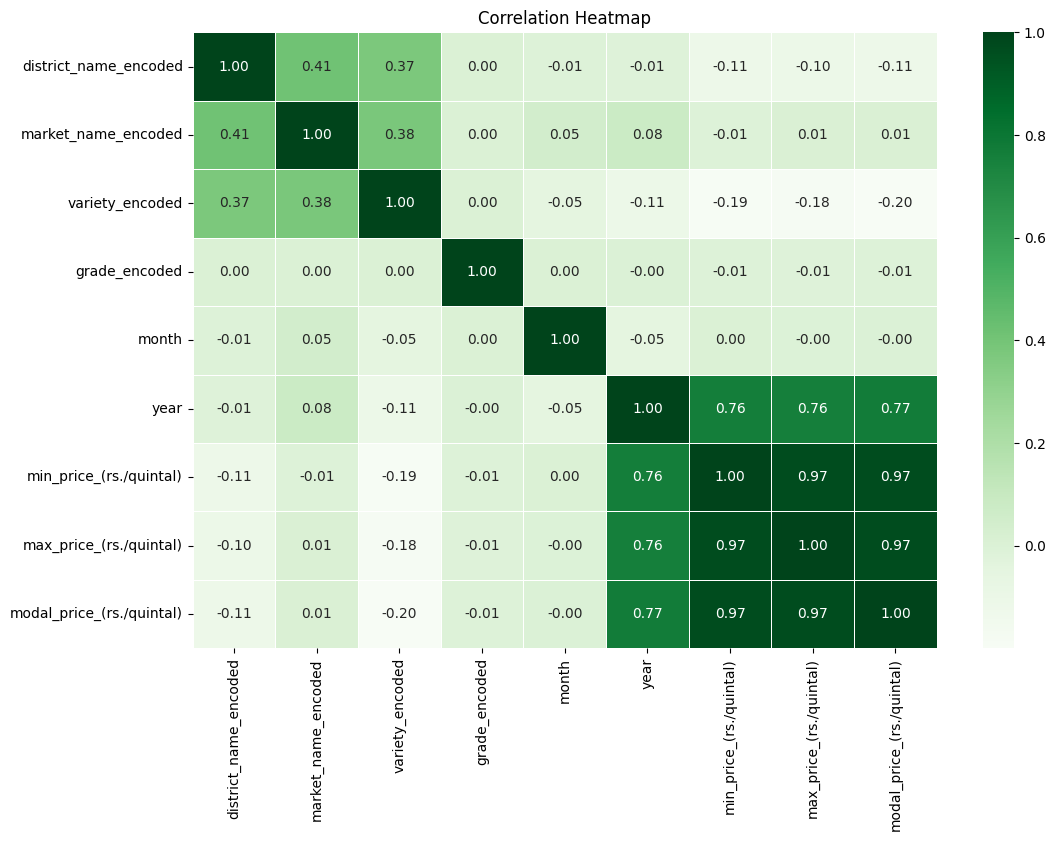

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df_encoded.corr(), annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Models and Evaluation

In [45]:
# Evaluation Metrics

def Emetrics(y_test,y_pred):
  from sklearn import metrics

  # Print result of MAE
  print(f"Mean Absoulute error is : {metrics.mean_absolute_error(y_test,y_pred)}")

  # Print result of RMSE
  print(f"Root Mean Square error is: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")

  # Print result of R2
  print(f"R2 score is: {metrics.r2_score(y_test,y_pred)}")

In [46]:
df_encoded.head(5)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,30,30,34911,239298,8,2008,2008-08-06,1100.0,1150.0,1125.0
1,30,30,34911,239298,8,2008,2008-08-05,1150.0,1160.0,1155.0
2,30,30,34911,239298,8,2008,2008-08-04,1050.0,1090.0,1075.0
3,30,30,34911,239298,8,2008,2008-08-02,1150.0,1175.0,1165.0
4,30,30,34911,239298,8,2008,2008-08-01,1150.0,1175.0,1165.0


In [47]:
df_encoded['grade_encoded'].unique()

array([239298,      1])

# Outlier Removing rows

In [48]:

import pandas as pd
from scipy.stats import zscore

# Assuming df_encoded is your DataFrame
# Replace 'df_encoded' with your actual DataFrame name

# Function to identify outliers using Z-score
def identify_outliers_zscore(df, threshold=3):
    z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))
    outliers = (abs(z_scores) > threshold).any(axis=1)
    return outliers

# Identify outliers
outliers = identify_outliers_zscore(df_encoded)

# Remove rows with outliers
df_cleaned = df_encoded[~outliers]

In [49]:
df_encoded = df_cleaned

In [50]:
df_encoded['grade_encoded'].nunique()

1

## Standardizing values (min-max scalar)

In [51]:
df_encoded

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,30,30,34911,239298,8,2008,2008-08-06,1100.0,1150.0,1125.0
1,30,30,34911,239298,8,2008,2008-08-05,1150.0,1160.0,1155.0
2,30,30,34911,239298,8,2008,2008-08-04,1050.0,1090.0,1075.0
3,30,30,34911,239298,8,2008,2008-08-02,1150.0,1175.0,1165.0
4,30,30,34911,239298,8,2008,2008-08-01,1150.0,1175.0,1165.0
...,...,...,...,...,...,...,...,...,...,...
239294,4094,15,40324,239298,12,2020,2020-12-19,1600.0,1620.0,1610.0
239295,4094,15,40324,239298,12,2020,2020-12-14,1600.0,1620.0,1610.0
239296,4094,15,40324,239298,12,2020,2020-12-12,1600.0,1620.0,1610.0
239297,4094,15,40324,239298,10,2020,2020-10-27,1400.0,1600.0,1500.0


In [52]:
# Columns to be scaled
columns_to_scale = ['district_name_encoded', 'market_name_encoded', 'variety_encoded', 'grade_encoded']

# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
df_encoded[columns_to_scale] = min_max_scaler.fit_transform(df_encoded[columns_to_scale])


# Standard Scaling
"""
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
df_encoded[columns_to_scale] = standard_scaler.fit_transform(df_encoded[columns_to_scale])
"""


# Robust Scaling
"""
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
df_encoded[columns_to_scale] = robust_scaler.fit_transform(df_encoded[columns_to_scale])
"""

# Power Transformer
"""
from sklearn.preprocessing import PowerTransformer

power_transformer = PowerTransformer(method='yeo-johnson')
df_encoded[columns_to_scale] = power_transformer.fit_transform(df_encoded[columns_to_scale])
"""

# Quantile Transformer - uniform
"""
from sklearn.preprocessing import QuantileTransformer

quantile_transformer = QuantileTransformer(output_distribution='uniform')
df_encoded[columns_to_scale] = quantile_transformer.fit_transform(df_encoded[columns_to_scale])
"""

# Quantile Transformer - normal
"""
from sklearn.preprocessing import QuantileTransformer

quantile_transformer = QuantileTransformer(output_distribution='normal')
df_encoded[columns_to_scale] = quantile_transformer.fit_transform(df_encoded[columns_to_scale])
"""

"\nfrom sklearn.preprocessing import QuantileTransformer\n\nquantile_transformer = QuantileTransformer(output_distribution='normal')\ndf_encoded[columns_to_scale] = quantile_transformer.fit_transform(df_encoded[columns_to_scale])\n"

In [53]:
df_encoded.head(5)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,0.001415,0.008418,0.2189,0.0,8,2008,2008-08-06,1100.0,1150.0,1125.0
1,0.001415,0.008418,0.2189,0.0,8,2008,2008-08-05,1150.0,1160.0,1155.0
2,0.001415,0.008418,0.2189,0.0,8,2008,2008-08-04,1050.0,1090.0,1075.0
3,0.001415,0.008418,0.2189,0.0,8,2008,2008-08-02,1150.0,1175.0,1165.0
4,0.001415,0.008418,0.2189,0.0,8,2008,2008-08-01,1150.0,1175.0,1165.0


In [54]:
df_encoded['grade_encoded'].nunique()

1

## Forward Stepwise Selection

In [55]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def forward_stepwise_selection(X, y):
    # Initialize an empty set of features
    selected_features = []

    # Initialize a linear regression model
    model = LinearRegression()

    # Loop until all features have been added to the model
    while len(selected_features) < X.shape[1]:

        # Initialize variables to keep track of best feature and score
        best_feature = None
        best_score = -np.inf

        # Loop over all remaining features
        for feature in X.columns:
            if feature not in selected_features:
                # Fit a model with the current set of features plus the new feature
                current_features = selected_features + [feature]
                X_current = X[current_features]
                model.fit(X_current, y)

                # Calculate the score for the new model
                y_pred = model.predict(X_current)
                score = r2_score(y, y_pred)

                # Keep track of the best feature and score
                if score > best_score:
                    best_feature = feature
                    best_score = score

        # Add the best feature to the selected features and print the result
        selected_features.append(best_feature)
        print(f'Selected feature: {best_feature}, Score: {best_score:.4f}')

    return selected_features


In [56]:
X = df_encoded.loc[:, ['district_name_encoded',	'market_name_encoded',	'variety_encoded',	'grade_encoded',	'month',	'year']]
y = df_encoded.loc[:, ['min_price_(rs./quintal)',	'max_price_(rs./quintal)',	'modal_price_(rs./quintal)']]

In [57]:
print(forward_stepwise_selection(X, y))

Selected feature: year, Score: 0.6378
Selected feature: variety_encoded, Score: 0.6517
Selected feature: district_name_encoded, Score: 0.6557
Selected feature: month, Score: 0.6568
Selected feature: market_name_encoded, Score: 0.6570
Selected feature: grade_encoded, Score: 0.6570
['year', 'variety_encoded', 'district_name_encoded', 'month', 'market_name_encoded', 'grade_encoded']


### All the features are closely important

In [58]:
X.head(5)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,month,year
0,0.001415,0.008418,0.2189,0.0,8,2008
1,0.001415,0.008418,0.2189,0.0,8,2008
2,0.001415,0.008418,0.2189,0.0,8,2008
3,0.001415,0.008418,0.2189,0.0,8,2008
4,0.001415,0.008418,0.2189,0.0,8,2008


In [59]:
y.head(5)

,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,1100.0,1150.0,1125.0
1,1150.0,1160.0,1155.0
2,1050.0,1090.0,1075.0
3,1150.0,1175.0,1165.0
4,1150.0,1175.0,1165.0


## Linear Regression

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state = 42)

In [62]:
from sklearn.linear_model import LinearRegression
lnregressor = LinearRegression()
lnregressor.fit(X_train,y_train)

LinearRegression()

In [63]:
y_pred = lnregressor.predict(X_test)
y_pred

array([[1994.50224531, 2092.58097172, 2050.68034077],
       [1264.34601537, 1328.08944704, 1305.97630464],
       [ 692.4131892 ,  719.26583876,  730.46586079],
       ...,
       [ 838.86173889,  864.23678394,  865.26785522],
       [ 728.90614185,  764.49233409,  771.22539139],
       [ 845.98110221,  875.83442748,  894.16056512]])

In [64]:
# Evaluation metrics for Linear Regression
Emetrics(y_test,y_pred)

Mean Absoulute error is : 213.2269999886221
Root Mean Square error is: 304.35366629935214
R2 score is: 0.6556595843737087


## Decision Tree Regression

In [65]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model using the training sets
dt_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_regressor.predict(X_test)

In [66]:
# Evaluation metrics for Linear Regression
Emetrics(y_test,y_pred)

Mean Absoulute error is : 51.97022531754024
Root Mean Square error is: 106.16637998776571
R2 score is: 0.9583039834400852


## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=250, random_state=42, bootstrap=True, max_depth=70)

# Train the model using the training sets
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_regressor.predict(X_test)

In [ ]:
Emetrics(y_test,y_pred)

## XgBoost Regression

In [ ]:
from xgboost import XGBRegressor
# Create the XGBoost regression model
xg_regressor = XGBRegressor(n_estimators=250, learning_rate=0.29,random_state=42)

# Train the model
xg_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xg_regressor.predict(X_test)

# Evaluate the model's performance
Emetrics(y_test,y_pred)

## KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create the KNN regression model
knn_regressor = KNeighborsRegressor(n_neighbors=7)  # You can adjust the number of neighbors as needed

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_regressor.predict(X_test)


# Evaluate the model's performance
Emetrics(y_test,y_pred)

# Datasets of Barley

## Main

In [ ]:
df

### Saving the dataframe of barley

> Indented block



In [ ]:
df.to_csv('newbdf.csv')

## Encoded

In [ ]:
df_encoded

### Saving the encoded dataframe of barley

In [ ]:
df_encoded.to_csv('newbencdf.csv')

# Saving the Best Model

In [ ]:
"""
import pickle

# Pickle the model
with open('rf_regressor.pkl', 'wb') as f:
    pickle.dump(rf_regressor, f)
"""